# **Project Name:**    

#$\color{RED}{\text{ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS}}$

PROJECT TYPE- **UNSUPERVISED ML**


> CONTRIBUTION- TEAM


1.   **NEHA JADHAV**
2.   **AKANKSHA JADHAV**

# **PROJECT SUMMARY-**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India

# **GITHUB LINK:** 

# **Problem Statement**

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

**Attribute Information**

**Zomato Restaurant names and Metadata**

Use this dataset for clustering part
1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part.
1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **LET'S BEGIN!**

##**IMPORTING AND LOADING THE DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/Capstone project-04/Zomato Restaurant names and Metadata.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Capstone project-04/Zomato Restaurant reviews.csv')

In [4]:
#Creating copy of both the datasets
df_name=data1.copy()
df_review=data2.copy()

In [7]:
#Getting the first 10 rows of dataset
df_name.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."


In [8]:
#checking the last 10 rows of the dataset
df_name.tail(10)

,Name,Links,Cost,Collections,Cuisines,Timings
95,Desi Bytes,https://www.zomato.com/hyderabad/desi-bytes-ga...,400,NaN,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed"
96,Hyderabadi Daawat,https://www.zomato.com/hyderabad/hyderabadi-da...,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun)
97,Zega - Sheraton Hyderabad Hotel,https://www.zomato.com/hyderabad/zega-sheraton...,"1,750",NaN,"Asian, Sushi",12Noon to 2AM (Mon-Sun)
98,Triptify,https://www.zomato.com/hyderabad/triptify-gach...,400,NaN,North Indian,11 AM to 11 PM
99,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM"
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [9]:
#checking the information of the dataset
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
#Shape of the dataset
df_name.shape

(105, 6)

We have 105 observations and 6 columns

In [11]:
#Checking the description
df_name.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


##**Checking null values and removing them.**

In [13]:
#Checking for null values
df_name.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

There are null values present in our dataset.

In [14]:
#calculating null value percent
na_percent={}
for col in list(df_name.columns):
  x= ((df_name[col].isnull().sum())/(len(df_name[col]))*100)
  na_percent[col] = x
print(na_percent)

{'Name': 0.0, 'Links': 0.0, 'Cost': 0.0, 'Collections': 51.42857142857142, 'Cuisines': 0.0, 'Timings': 0.9523809523809524}


In [15]:
# Dropping the 'Collections' feature
df_name.drop(columns = 'Collections',axis =1,inplace = True)

In [16]:
#fill null values for timing col

df_name.fillna(value = 0, axis = 0,inplace = True)

##**Check for Datatypes for each column**

In [17]:
#Checking the info of the dataset 
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


All columns are of object datatype.

In [18]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [19]:
#checking first 5 hotel Names
df_name['Name'][:5]

0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [20]:
#Checking type of the column Name
type(df_name['Name'])

pandas.core.series.Series

In [21]:
df_name['Name'] = df_name['Name'].apply(lambda x:str(x))

In [25]:
df_name['Name'][:5]


0                   Beyond Flavours
1                          Paradise
2                          Flechazo
3    Shah Ghouse Hotel & Restaurant
4        Over The Moon Brew Company
Name: Name, dtype: object

In [23]:
#check for Links
df_name['Links'][:5]

0    https://www.zomato.com/hyderabad/beyond-flavou...
1    https://www.zomato.com/hyderabad/paradise-gach...
2    https://www.zomato.com/hyderabad/flechazo-gach...
3    https://www.zomato.com/hyderabad/shah-ghouse-h...
4    https://www.zomato.com/hyderabad/over-the-moon...
Name: Links, dtype: object

In [26]:
type(df_name['Links'][0])

str

In [27]:
# Applying 'Cost' feature
type(df_name['Cost'][0])

str

In [28]:
df_name['Cost'][0:5]

0      800
1      800
2    1,300
3      800
4    1,200
Name: Cost, dtype: object

In [29]:
# 'Cost' feature
# Replacing ',' 
df_name['Cost'] = df_name['Cost'].str.replace(',','')

# Converting 'cost' feature to integer datatype
df_name['Cost'] = df_name['Cost'].apply(lambda x:int(x))

In [30]:
#check for Cuisines
print(df_name['Cuisines'][:5])
print(type(df_name['Cuisines'][0]))

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object
<class 'str'>


In [31]:
def get_cuisines(x):
  return x.split(', ')

In [32]:
#check for Cuisines
df_name['Cuisines'] = df_name['Cuisines'].apply(lambda x : get_cuisines(x))

In [33]:
df_name['Cuisines'].nunique

<bound method IndexOpsMixin.nunique of 0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object>

In [34]:
type(df_name['Cuisines'][0])

list

In [35]:
#check for Timings
print(df_name['Timings'][:5])
print(type(df_name['Timings'][0]))

0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                                       11 AM to 11 PM
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3                                      12 Noon to 2 AM
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...
Name: Timings, dtype: object
<class 'str'>


##**Top 10 Costly restaurants**

In [43]:
top_10_costly_rest=df_name[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

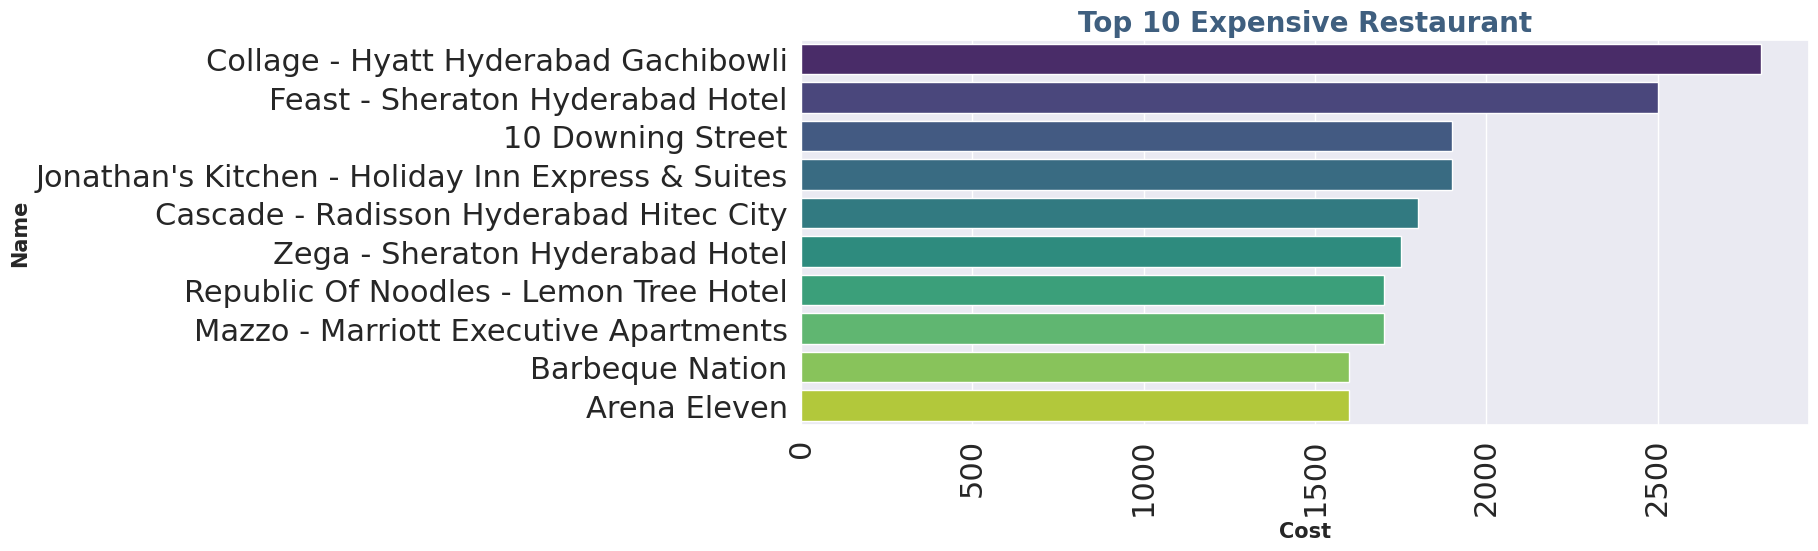

In [48]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(13,5))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

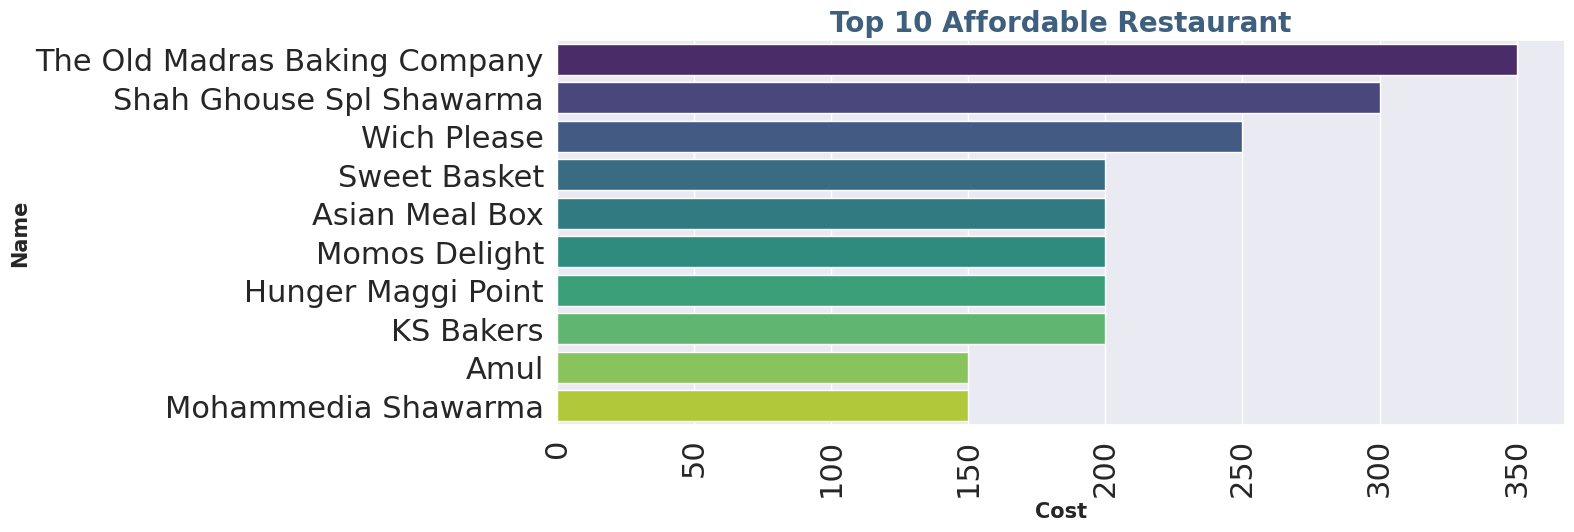

In [49]:
# Affordable price restaurants
plt.figure(figsize=(13,5))
top_10_affor_rest=df_name[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

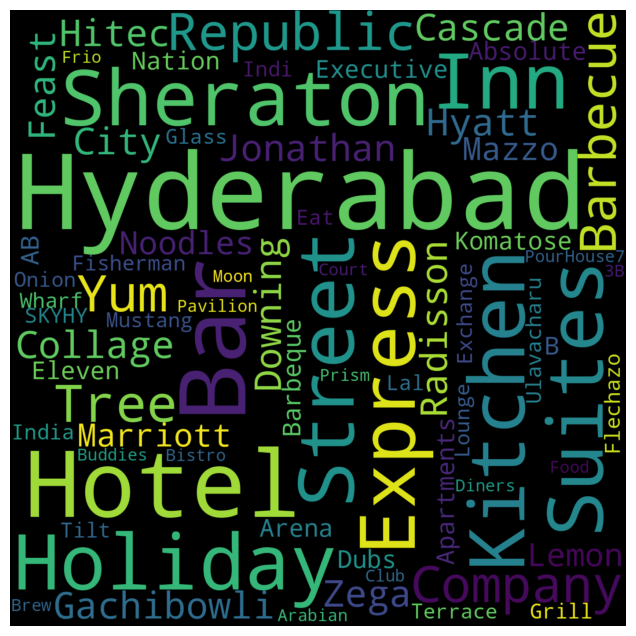

In [51]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in df_name.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

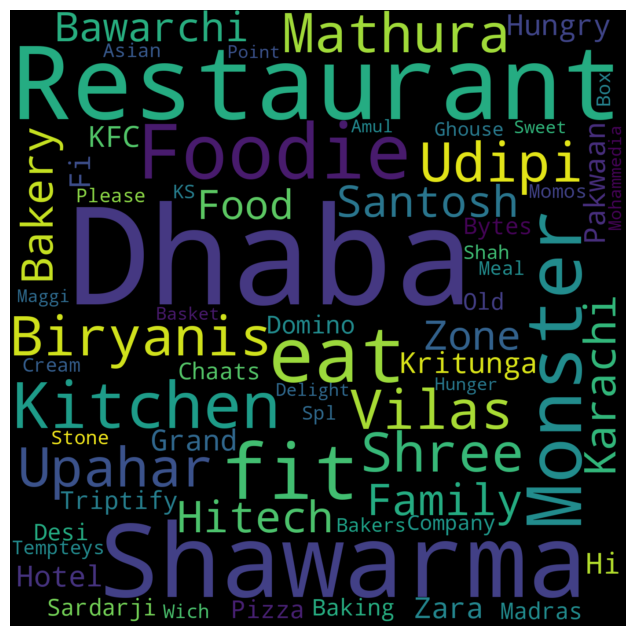

In [53]:
#Creating word cloud for cheap restaurants

plt.figure(figsize=(15,8))
text = " ".join(name for name in df_name.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [54]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

['chinese', 'continental', 'kebab', 'european', 'south indian', 'north indian'],['biryani', 'north indian', 'chinese'],['asian', 'mediterranean', 'north indian', 'desserts'],['biryani', 'north indian', 'chinese', 'seafood', 'beverages'],['asian', 'continental', 'north indian', 'chinese', 'mediterranean'],['seafood', 'goan', 'north indian', 'continental', 'asian'],['healthy food', 'north indian', 'continental', 'south indian'],['lebanese'],['american', 'chinese', 'north indian', 'kebab', 'south indian'],['ice cream', 'desserts'],['street food', 'north indian', 'fast food'],['mediterranean', 'north indian', 'kebab', 'bbq'],['continental', 'american', 'chinese'],['north indian', 'italian', 'finger food'],['european', 'mediterranean', 'north indian'],['burger', 'fast food'],['north indian'],['chinese', 'north indian'],['north indian', 'chinese', 'continental'],['north indian', 'chinese', 'biryani'],['north indian'],['north indian', 'japanese', 'italian', 'salad', 'sushi'],['american'],['ic

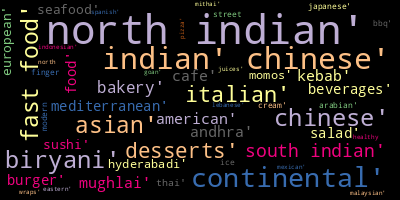

In [59]:
# Visualization of words from 'Cuisines' feature
df_name['Cuisines']= df_name['Cuisines'].astype(str)

ps = PorterStemmer() 
df_name['Cuisines']=df_name['Cuisines'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df_name['Cuisines'].values))
print(long_string)
wordcloud = WordCloud(background_color="black", max_words=100, contour_width=13,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

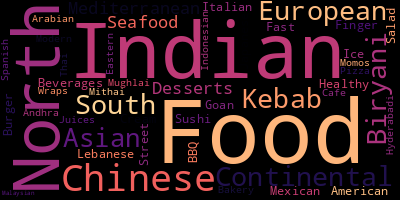

In [61]:
# Most nominated words from 'Cuisine' feature
words_list = cluisine_list.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(background_color='black',min_font_size = 1,colormap = 'magma').generate(strr) 
wordcloud.to_image()

##**Distribuition of cost column**

<ipython-input-62-2867cb84b0db>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_name['Cost'], kde=True,ax=ax, color = 'g')


<Figure size 1000x500 with 0 Axes>

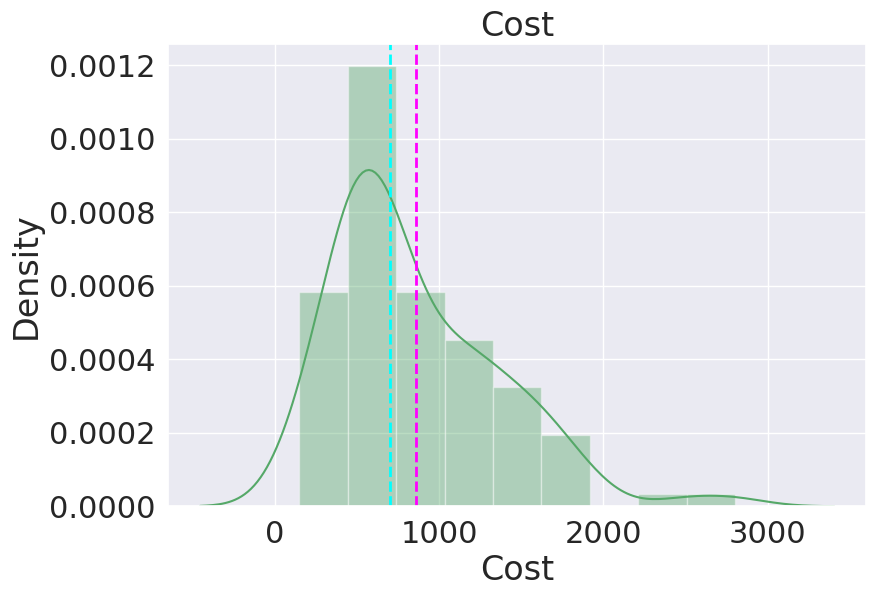

In [62]:
plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
continous = df_name['Cost']
sns.distplot(df_name['Cost'], kde=True,ax=ax, color = 'g')
ax.axvline(continous.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(continous.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Cost')
plt.show()

In [63]:
avg_cost = pd.DataFrame(df_name.groupby(df_name['Name']).agg({'Cost':'mean'})).reset_index()
avg_cost.sort_values(by = 'Cost',ascending = False,inplace= True)
avg_cost.head()

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0


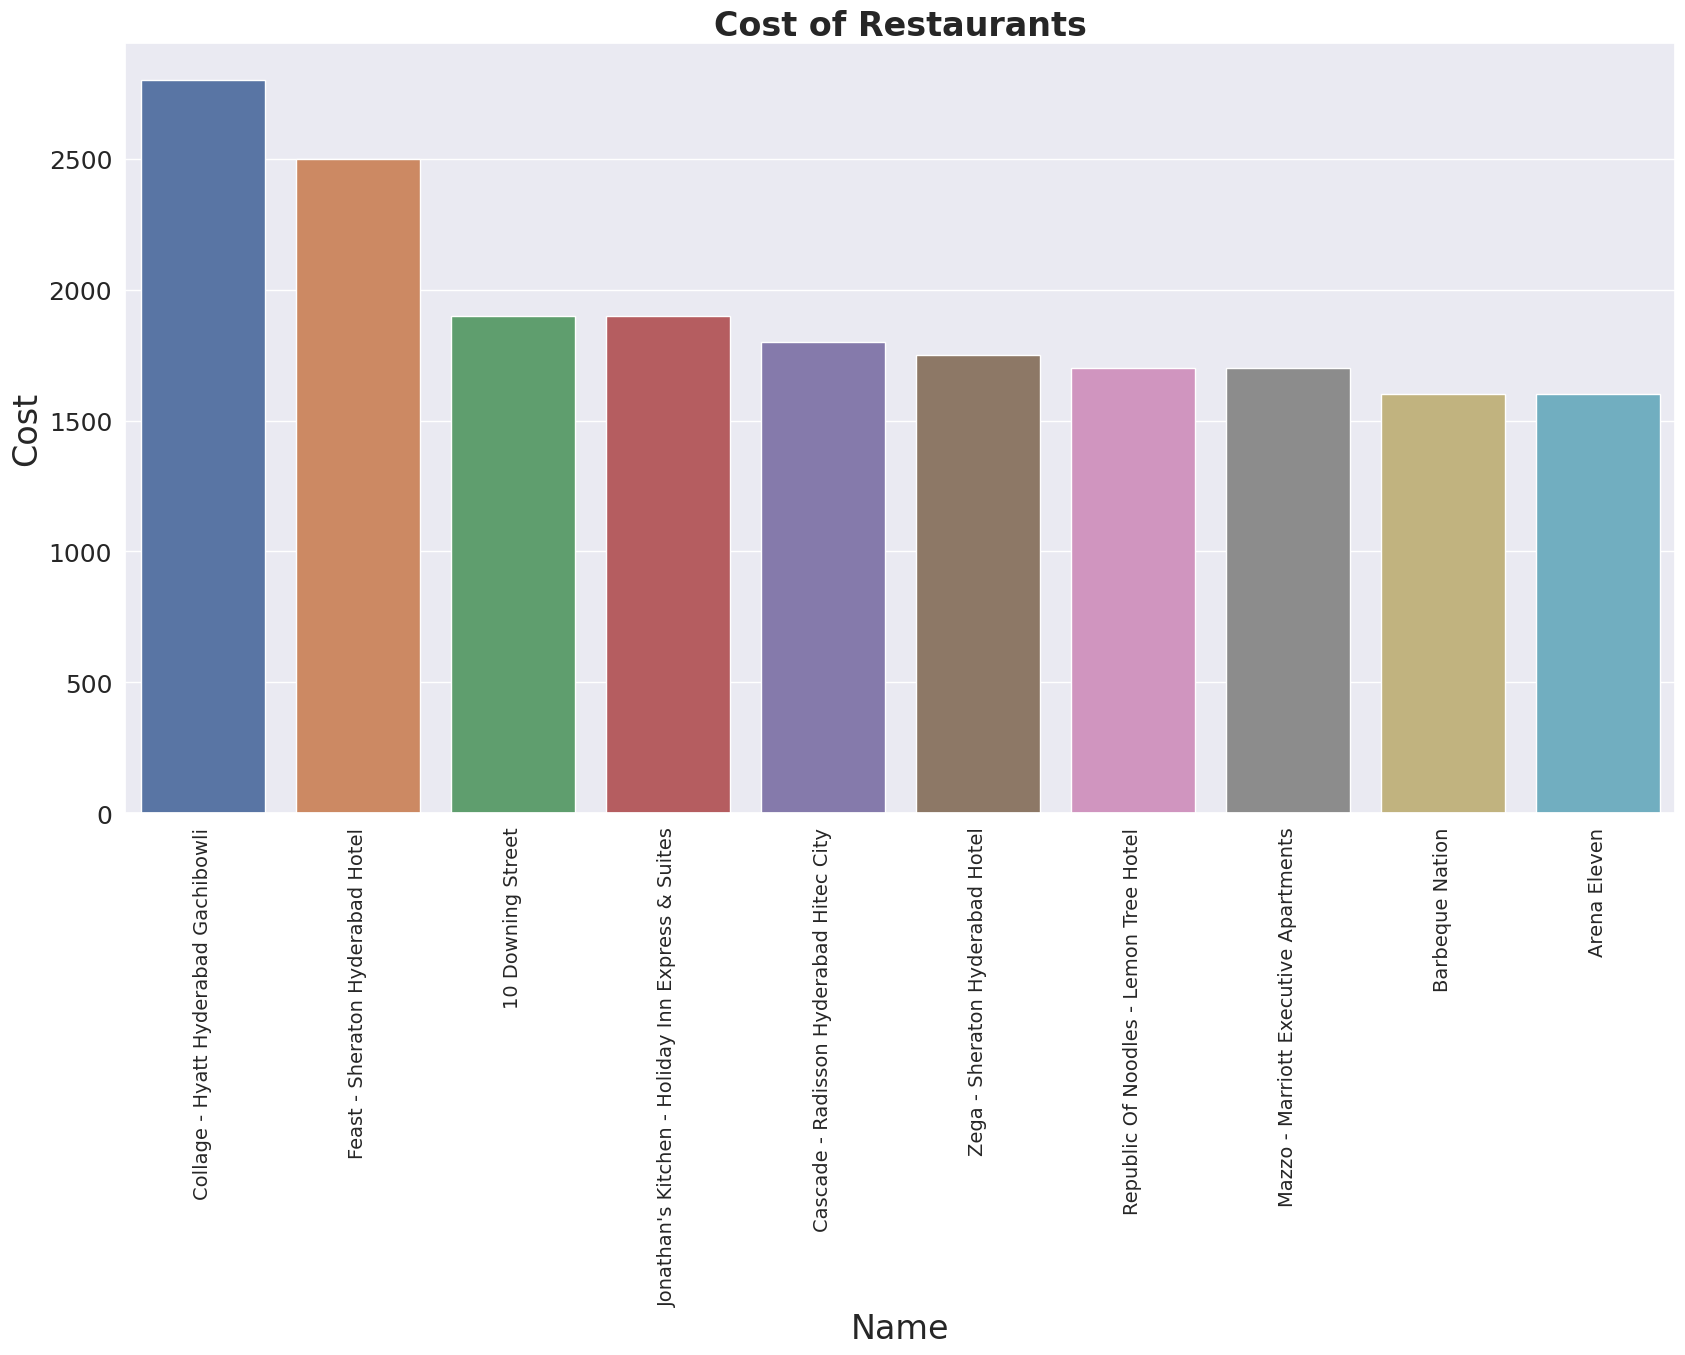

In [64]:
# Visualization of Top 10 Restaurant names and their respective cost
plt.figure(figsize = (20, 10))
sns.set(font_scale = 2)
sns.barplot(data = avg_cost[:10],x = avg_cost['Name'][:10],y = avg_cost['Cost'][:10])
plt.title('Cost of Restaurants',fontweight='bold')
plt.xticks(rotation = 90,fontsize = 14)
plt.yticks(fontsize = 18)
plt.show()

In [65]:
# Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(df_name[['Cuisines','Links','Timings']])

In [66]:
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [67]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"['chinese', 'continental', 'kebab', 'european'...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"['biryani', 'north indian', 'chinese']",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"['asian', 'mediterranean', 'north indian', 'de...","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"['biryani', 'north indian', 'chinese', 'seafoo...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"['asian', 'continental', 'north indian', 'chin...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [68]:
df_name['Cuisines']= df_name['Cuisines'].astype(str)

**Create functions for preprocessing**

In [69]:
# Functions
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
      word = str(word)
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

In [70]:
# Applying functions
col_lsts = ['Links','Cuisines','Timings']
for col_lst in col_lsts:
  df_name[col_lst] = normalize(df_name[col_lst])

In [71]:
df_name.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,httpswwwzomatocomhyderabadbeyondflavoursgachib...,800,chinese continental kebab european south india...,12noon to 330pm 630pm to 1130pm monsun
1,Paradise,httpswwwzomatocomhyderabadparadisegachibowli,800,biryani north indian chinese,11 am to 11 pm
2,Flechazo,httpswwwzomatocomhyderabadflechazogachibowli,1300,asian mediterranean north indian desserts,1130 am to 430 pm 630 pm to 11 pm
3,Shah Ghouse Hotel & Restaurant,httpswwwzomatocomhyderabadshahghousehotelresta...,800,biryani north indian chinese seafood beverages,12 noon to 2 am
4,Over The Moon Brew Company,httpswwwzomatocomhyderabadoverthemoonbrewcompa...,1200,asian continental north indian chinese mediter...,12noon to 11pm mon tue wed thu sun 12noon to 1...


##**Preprocessing the dataset for Clustering models**

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [73]:
# Tfidf vectorizer
vectorizer = TfidfVectorizer(stop_words= 'english')
X = vectorizer.fit_transform(df_name['Cuisines'])

In [74]:
X.shape

(105, 47)

In [75]:
# Type of X object
type(X)

scipy.sparse._csr.csr_matrix